# Classification

In [11]:
pip install numpy

In [12]:
pip install pandas

In [13]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install matplotlib

## Linear Regression

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model

In [16]:
df = pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
df.drop('Community Area Number', axis=1, inplace=True)
df.drop(77, inplace=True)
df.head()

,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [17]:
print(df.shape)

(77, 8)


In [18]:
# X = df[['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED UNDER 18 OR OVER 64']] # .74
# X = df[['PERCENT AGED 16+ UNEMPLOYED', 'PERCENT OF HOUSING CROWDED']] # .84
# X = df[['PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']] # .90
# X = df[['PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED UNDER 18 OR OVER 64']] # .90
X = df[['PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT HOUSEHOLDS BELOW POVERTY']] # .95

y = df['HARDSHIP INDEX']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

predictions = reg.predict(X_test)
print('Target values from the test set:')
print(y_test)
print()
print('Predicted values for the test set')
print(predictions)


Target values from the test set:
4      6.0
35    78.0
10    25.0
0     39.0
45    75.0
47    38.0
66    89.0
53    98.0
50    65.0
28    87.0
68    66.0
74    30.0
18    70.0
12    33.0
58    61.0
33    82.0
9     21.0
5      5.0
34    47.0
22    85.0
30    76.0
40    14.0
39    88.0
16    28.0
Name: HARDSHIP INDEX, dtype: float64

Predicted values for the test set
[  2.62180787  79.68905808  27.24039525  36.47447915  69.79878596
  38.4142143   99.14463836 111.77826488  56.24759391  81.57967691
  61.60722272  30.8253324   69.05304924  27.16198406  61.13974937
  81.56100621  17.10997476   1.56229871  50.64953499  80.07083794
  79.85934614  14.19163643  90.36159601  28.19610464]


## Measure Performance

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [20]:
from sklearn.metrics import r2_score
#  proportion of the variance in the dependent variable that is predictable from the independent variables
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.9699170317247069


In [21]:
# the average absolute difference between the predicted and actual values.
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3.6933813927020296


In [22]:
import numpy as np
actual = np.array(y_test)
pred = np.array(predictions)
rmse = np.sqrt(np.mean((actual-pred) ** 2))
print(rmse)

4.966166655297882


## Visualizations

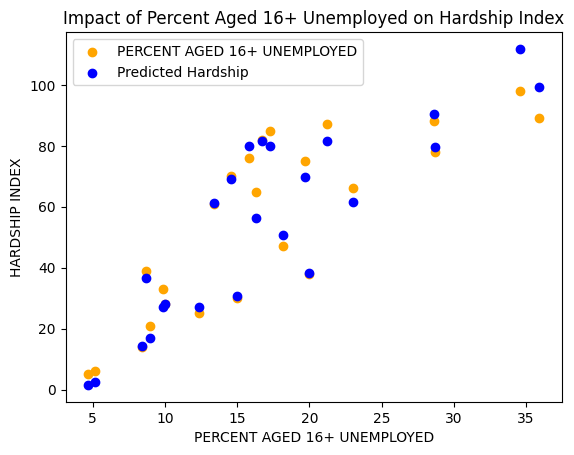

In [23]:
import matplotlib.pyplot as plt

x_1 = X_test.iloc[:, 0]
x_2 = X_test.iloc[:, 1]
x_3 = X_test.iloc[:, 2]

# Plotting- x, y
plt.scatter(x_1, y_test, color='orange', label='PERCENT AGED 16+ UNEMPLOYED')
plt.scatter(x_1, predictions, color='blue', label='Predicted Hardship')

plt.xlabel('PERCENT AGED 16+ UNEMPLOYED')
plt.ylabel('HARDSHIP INDEX')
plt.title('Impact of Percent Aged 16+ Unemployed on Hardship Index')
plt.legend()
plt.show()

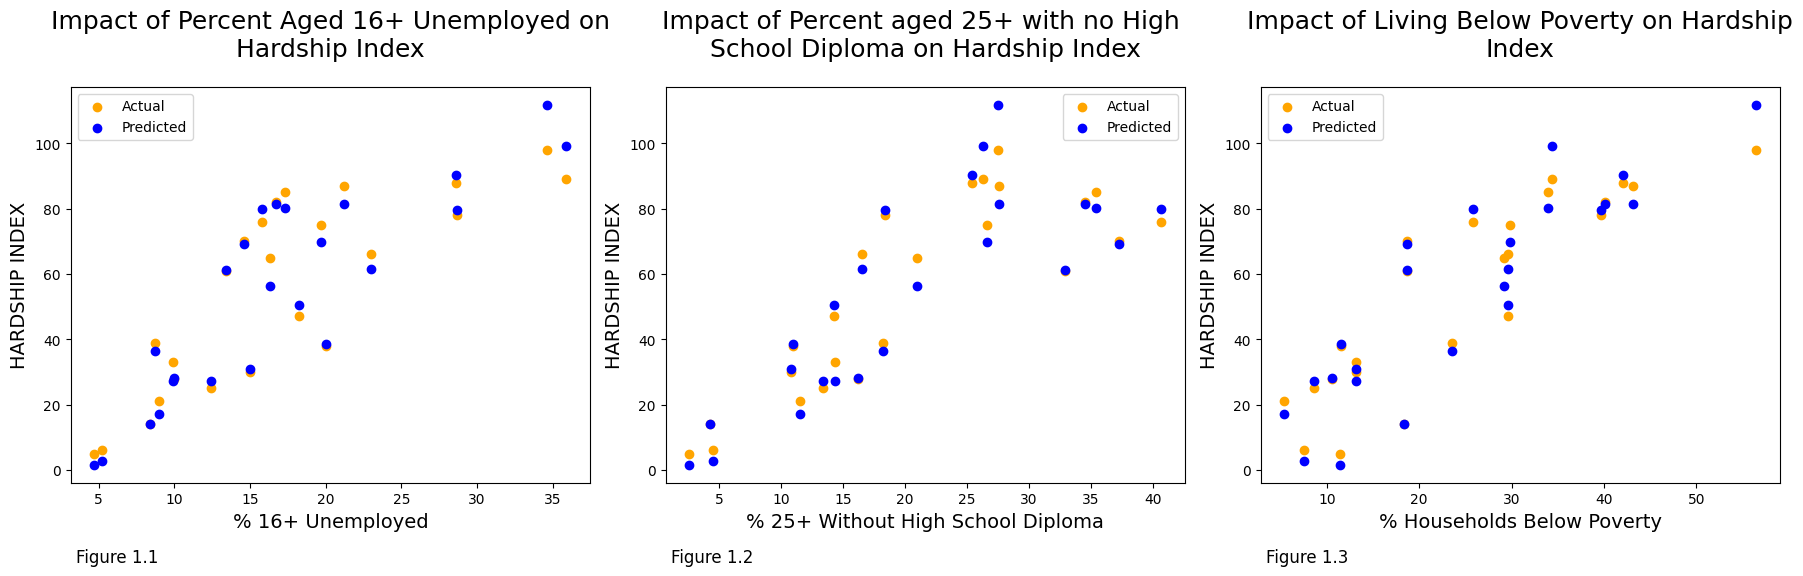

In [24]:
# 3 Feautures Selected
x_1 = X_test.iloc[:, 0]
x_2 = X_test.iloc[:, 1]
x_3 = X_test.iloc[:, 2]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.set_facecolor('#fff')

# PERCENT AGED 16+ UNEMPLOYED
axes[0].scatter(x_1, y_test, color='orange', label='Actual')
axes[0].scatter(x_1, predictions, color='blue', label='Predicted')
axes[0].set_xlabel('% 16+ Unemployed', fontsize=14)
axes[0].set_ylabel('HARDSHIP INDEX', fontsize=14)
axes[0].set_title('Impact of Percent Aged 16+ Unemployed on Hardship Index', wrap=True, fontsize=18, pad=25)
axes[0].legend()
axes[0].text(0.01, -0.20, 'Figure 1.1', transform=axes[0].transAxes, fontsize=12)

# PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
axes[1].scatter(x_2, y_test, color='orange', label='Actual')
axes[1].scatter(x_2, predictions, color='blue', label='Predicted')
axes[1].set_xlabel('% 25+ Without High School Diploma', fontsize=14)
axes[1].set_ylabel('HARDSHIP INDEX', fontsize=14)
axes[1].set_title('Impact of Percent aged 25+ with no High \nSchool Diploma on Hardship Index', wrap=True, fontsize=18, pad=25)
axes[1].legend()
axes[1].text(0.01, -0.20, 'Figure 1.2', transform=axes[1].transAxes, fontsize=12)

# PERCENT HOUSEHOLDS BELOW POVERTY
axes[2].scatter(x_3, y_test, color='orange', label='Actual')
axes[2].scatter(x_3, predictions, color='blue', label='Predicted')
axes[2].set_xlabel('% Households Below Poverty', fontsize=14) 
axes[2].set_ylabel('HARDSHIP INDEX', fontsize=14)
axes[2].set_title('Impact of Living Below Poverty on Hardship Index', wrap=True, fontsize=18, pad=25)
axes[2].legend()
axes[2].text(0.01, -0.20, 'Figure 1.3', transform=axes[2].transAxes, fontsize=12)

plt.tight_layout()

plt.show()

# Decision Tree

## Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
dt_regressor = DecisionTreeRegressor(max_depth=3)

dt_regressor.fit(X_train, y_train)

predictions2 = dt_regressor.predict(X_test)

## Measure Performance

In [27]:
mse = mean_squared_error(y_test, predictions2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 84.40375643004114


In [28]:
# the average absolute difference between the predicted and actual values.
mae = mean_absolute_error(y_test, predictions2)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 7.041898148148147


In [29]:
r2 = r2_score(y_test, predictions2)
print(f"R-squared: {r2}")

R-squared: 0.8970467923770622


In [30]:
pred2 = np.array(predictions2)
rmse2 = np.sqrt(np.mean((actual-pred2) ** 2))
print(rmse2)

9.187151703876514


In [31]:
from scipy import stats
t_statistic, p_value = stats.ttest_rel([rmse], [rmse2])
p_value

C:\Users\CBT-Student\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\CBT-Student\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


nan

## Visualizations

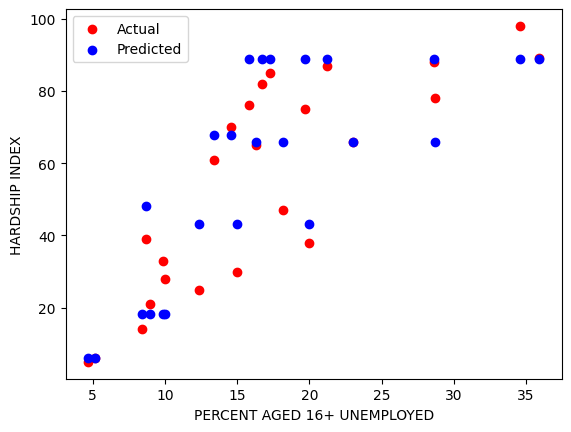

In [32]:
plt.scatter(X_test.iloc[:, 0], y_test, color='red', label='Actual')
plt.scatter(X_test.iloc[:, 0], predictions2, color='blue', label='Predicted')
plt.xlabel('PERCENT AGED 16+ UNEMPLOYED')
plt.ylabel('HARDSHIP INDEX')
plt.legend()
plt.show()

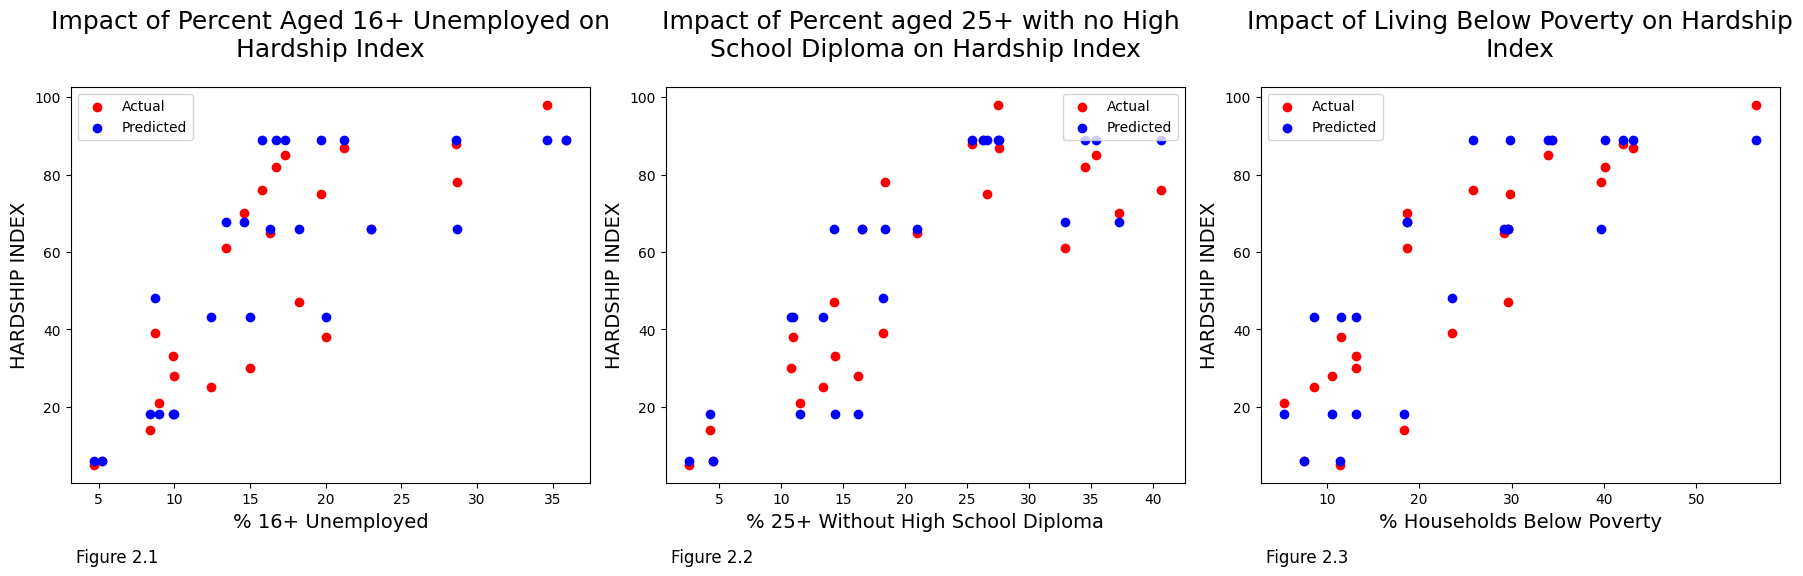

In [33]:
# 3 Feautures Selected
x_1 = X_test.iloc[:, 0]
x_2 = X_test.iloc[:, 1]
x_3 = X_test.iloc[:, 2]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.set_facecolor('#fff')

# PERCENT AGED 16+ UNEMPLOYED
axes[0].scatter(x_1, y_test, color='red', label='Actual')
axes[0].scatter(x_1, predictions2, color='blue', label='Predicted')
axes[0].set_xlabel('% 16+ Unemployed', fontsize=14)
axes[0].set_ylabel('HARDSHIP INDEX', fontsize=14)
axes[0].set_title('Impact of Percent Aged 16+ Unemployed on Hardship Index', wrap=True, fontsize=18, pad=25)
axes[0].legend()
axes[0].text(0.01, -0.20, 'Figure 2.1', transform=axes[0].transAxes, fontsize=12)

# PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
axes[1].scatter(x_2, y_test, color='red', label='Actual')
axes[1].scatter(x_2, predictions2, color='blue', label='Predicted')
axes[1].set_xlabel('% 25+ Without High School Diploma', fontsize=14)
axes[1].set_ylabel('HARDSHIP INDEX', fontsize=14)
axes[1].set_title('Impact of Percent aged 25+ with no High \nSchool Diploma on Hardship Index', wrap=True, fontsize=18, pad=25)
axes[1].legend()
axes[1].text(0.01, -0.20, 'Figure 2.2', transform=axes[1].transAxes, fontsize=12)

# PERCENT HOUSEHOLDS BELOW POVERTY
axes[2].scatter(x_3, y_test, color='red', label='Actual')
axes[2].scatter(x_3, predictions2, color='blue', label='Predicted')
axes[2].set_xlabel('% Households Below Poverty', fontsize=14) 
axes[2].set_ylabel('HARDSHIP INDEX', fontsize=14)
axes[2].set_title('Impact of Living Below Poverty on Hardship Index', wrap=True, fontsize=18, pad=25)
axes[2].legend()
axes[2].text(0.01, -0.20, 'Figure 2.3', transform=axes[2].transAxes, fontsize=12)

plt.tight_layout()

plt.show()

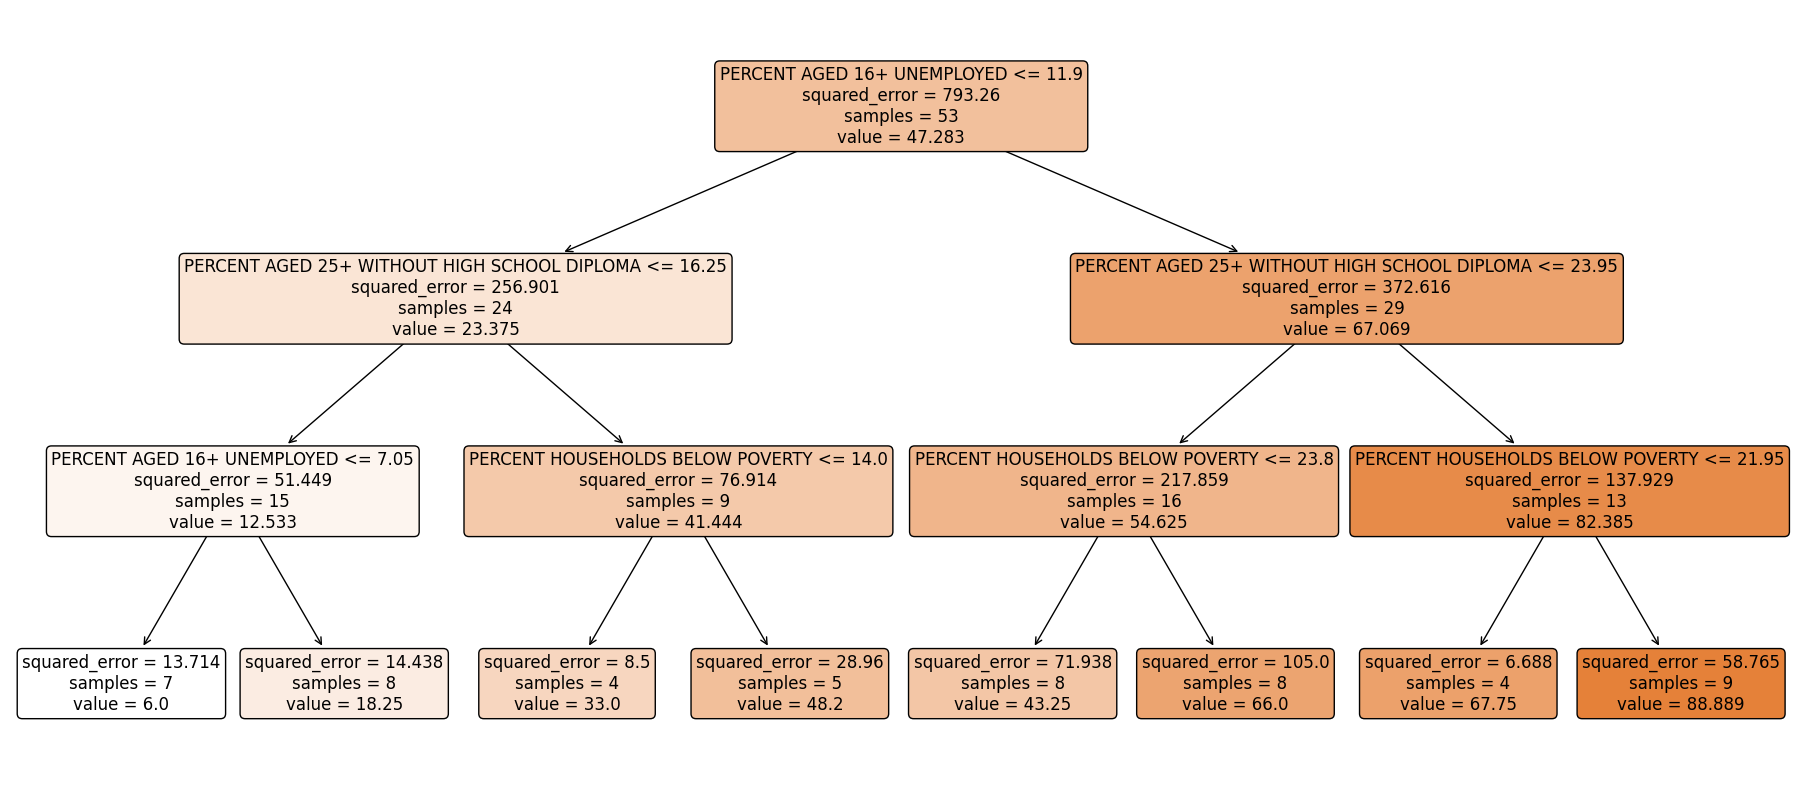

In [34]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

decision_tree = plt.figure(figsize=(23, 10))

plot_tree(dt_regressor, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=12)
decision_tree.set_facecolor('#fff')

plt.show()


# 2. Clustering

## Agglomerative Hierarchical Clustering

In [35]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

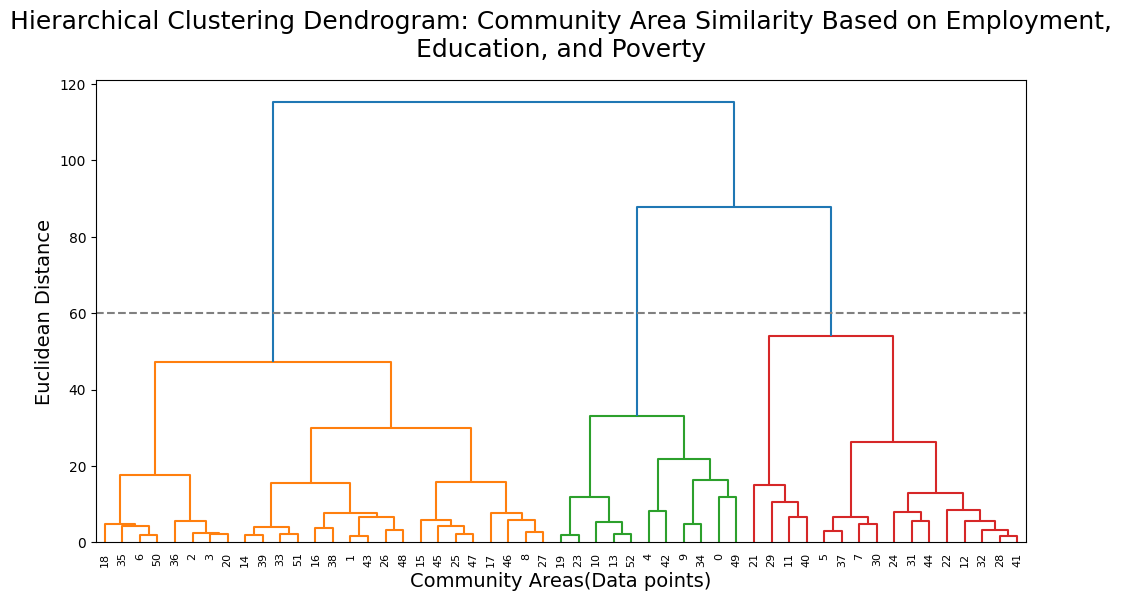

In [36]:
linkage_matrix1 = linkage(X_test, method='ward', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix1, leaf_rotation=90., leaf_font_size=8.)
plt.title('Hierarchical Clustering Dendrogram: Community Area Similarity Based on Employment, Education, and Poverty'
         , loc='center', fontsize=18, wrap=True, pad=20)
plt.xlabel('Community Areas(Data points)', fontsize=14)
plt.ylabel('Euclidean Distance', fontsize=14)
cutting_height = 60 
plt.axhline(y=cutting_height, color='gray', linestyle='--')
plt.show()

In [37]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
clusters = model.fit_predict(X_train)
clusters.shape

(53,)